# Lab Nov 29

In [1]:
from scipy.integrate import solve_ivp

# `solve_ivp(f, ts, y0, ...)`

# Params

### - `f`: Right hand side of the system: the time derivative of the state $y$ and time $t$

### - `ts`: Time points at which to solve for $y$. (interval of integration)

### - `y0`: Initial state

# Returns

-------
## - Bunch object with the following fields defined:
1. t : ndarray, shape (n_points,)
        Time points.
2. y : ndarray, shape (n, n_points)
        Values of the solution at `t`.
3. sol : `OdeSolution` or None
        Found solution as `OdeSolution` instance; None if `dense_output` was
        set to False.
4. t_events : list of ndarray or None
        Contains for each event type a list of arrays at which an event of
        that type event was detected. None if `events` was None.
5. y_events : list of ndarray or None
        For each value of `t_events`, the corresponding value of the solution.
        None if `events` was None.
6. nfev : int
        Number of evaluations of the right-hand side.
7. njev : int
        Number of evaluations of the Jacobian.
8. nlu : int
        Number of LU decompositions.
###   9. status : int
        Reason for algorithm termination:
    
            * -1: Integration step failed.
            *  0: The solver successfully reached the end of `tspan`.
            *  1: A termination event occurred.
    
10. message : string
        Human-readable description of the termination reason.
11. success : bool
        True if the solver reached the interval end or a termination event
        occurred (``status >= 0``). 

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.030e-01 ...  2.970e+01  3.000e+01]
        y: [[ 2.000e+00  2.853e+00 ...  1.004e+00  9.950e-01]
            [ 4.000e+00  2.853e+00 ...  1.004e+00  9.950e-01]
            ...
            [ 7.000e+00  1.226e+01 ...  1.428e+00  1.415e+00]
            [ 8.000e+00  1.226e+01 ...  1.428e+00  1.415e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 71720
     njev: 0
      nlu: 0


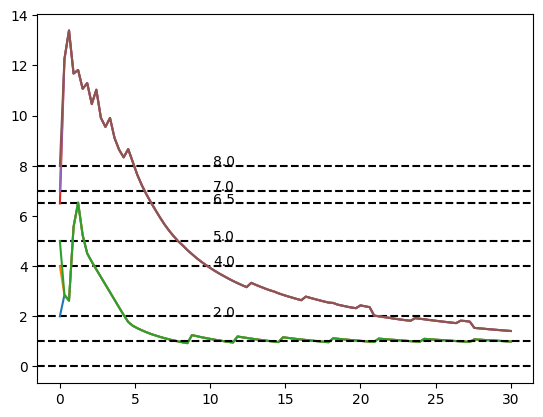

In [42]:
# Example
# --------
# sin(x+y)*cos(x*y)

import numpy as np
from scipy.integrate import solve_ivp

def tony_decay(t, y, k=10): 
    return k**2*np.sin(y+t)*np.cos(y*t)

starting_points = [2, 4, 5, 6.5, 7, 8]

ts = np.linspace(0, 30, 100)

sol = solve_ivp(tony_decay, t_span=[ts[0], ts[-1]], y0=starting_points, t_eval=ts)
print(sol)

import matplotlib.pyplot as plt

t = np.linspace(0, 10, 1000)
y = sol.y
for pt in starting_points:
    plt.axhline(pt, color='k', ls='--')
    plt.text(10.2, pt, f'{pt:.1f}')
plt.axhline(0, color='k', ls='--')
plt.axhline(1, color='k', ls='--')

    
plt.plot(sol.t, y.T, '-');



In [45]:
def upward_cannon(t, y): return [y[1], -0.5]
def hit_ground(t, y): return y[0]
hit_ground.terminal = True
hit_ground.direction = -1
sol = solve_ivp(upward_cannon, [0, 100], [0, 10], events=hit_ground)
sol

  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  9.999e-05  1.100e-03  1.110e-02  1.111e-01
             1.111e+00  1.111e+01  4.000e+01]
        y: [[ 0.000e+00  9.999e-04 ...  8.024e+01  4.263e-14]
            [ 1.000e+01  1.000e+01 ...  4.445e+00 -1.000e+01]]
      sol: None
 t_events: [array([ 4.000e+01])]
 y_events: [array([[ 4.263e-14, -1.000e+01]])]
     nfev: 44
     njev: 0
      nlu: 0

In [46]:
def apex(t, y): return y[1]
sol = solve_ivp(upward_cannon, [0, 100], [0, 10], events=(hit_ground, apex), dense_output=True)
sol

  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  9.999e-05  1.100e-03  1.110e-02  1.111e-01
             1.111e+00  1.111e+01  4.000e+01]
        y: [[ 0.000e+00  9.999e-04 ...  8.024e+01  4.263e-14]
            [ 1.000e+01  1.000e+01 ...  4.445e+00 -1.000e+01]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x1273b2590>
 t_events: [array([ 4.000e+01]), array([ 2.000e+01])]
 y_events: [array([[ 4.263e-14, -1.000e+01]]), array([[ 1.000e+02,  1.776e-15]])]
     nfev: 44
     njev: 0
      nlu: 0

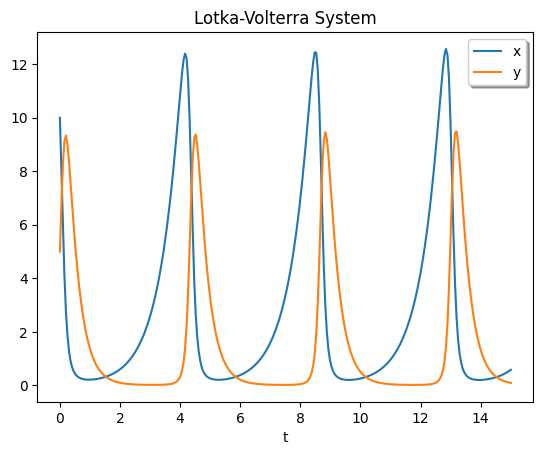

In [48]:

def lotkavolterra(t, z, a, b, c, d):
    x, y = z
    return [a*x - b*x*y, -c*y + d*x*y]
    
    
sol = solve_ivp(lotkavolterra, [0, 15], [10, 5], args=(1.5, 1, 3, 1), dense_output=True)
    
    
t = np.linspace(0, 15, 300)
z = sol.sol(t)
import matplotlib.pyplot as plt
plt.plot(t, z.T)
plt.xlabel('t')
plt.legend(['x', 'y'], shadow=True)
plt.title('Lotka-Volterra System')
plt.show()


In [78]:
# can also try to solve analytically

from sympy import (init_printing,
                   lambdify, Integral,
                   symbols, Function, 
                   diff, Eq, dsolve, 
                   cos, sin, exp)
init_printing()

In [82]:
T = symbols('T')
y = Function('y')

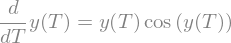

In [84]:
equation = Eq(diff(y(T), T), y(T)*cos(y(T)))
equation

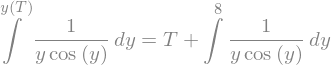

In [85]:
yT = dsolve(equation, ics = {y(0):8})
yT

/var/folders/b6/zjrzfvq14h12kvt3_h7c4fwr0000gn/T/ipykernel_1811/1576916783.py:14: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  p[0].set_data(*data_point)
/var/folders/b6/zjrzfvq14h12kvt3_h7c4fwr0000gn/T/ipykernel_1811/1576916783.py:16: RuntimeWarning: divide by zero encountered in log
  trail_plots.append(ax.plot(*data_point, 'o', ms=5/np.log(len(plotted)), color='k'))


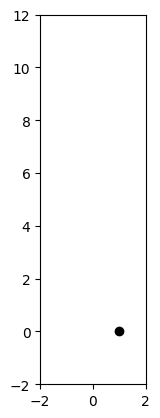

In [105]:
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.pyplot import subplots

fig, ax = subplots()
p = ax.plot([0, np.cos(0)], [0, np.sin(0)], '-ok')
ax.set_aspect(1.0)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 12)

plotted = []
trail_plots = []
def update(i):
    data_point = np.cos(i), i
    p[0].set_data(*data_point)
    if data_point not in plotted:
        trail_plots.append(ax.plot(*data_point, 'o', ms=5/np.log(len(plotted)), color='k'))
        plotted.append(data_point)


animation = FuncAnimation(fig, update, frames=np.linspace(0, 10, 100), interval=100)

In [106]:
from IPython.display import HTML
HTML(animation.to_html5_video())

/var/folders/b6/zjrzfvq14h12kvt3_h7c4fwr0000gn/T/ipykernel_1811/1576916783.py:14: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  p[0].set_data(*data_point)
/var/folders/b6/zjrzfvq14h12kvt3_h7c4fwr0000gn/T/ipykernel_1811/1576916783.py:16: RuntimeWarning: divide by zero encountered in scalar divide
  trail_plots.append(ax.plot(*data_point, 'o', ms=5/np.log(len(plotted)), color='k'))


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/transforms.py:2069: RuntimeWarning: invalid value encountered in scalar multiply
  self._mtx[0, 1] *= sx
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/transforms.py:2070: RuntimeWarning: invalid value encountered in scalar multiply
  self._mtx[0, 2] *= sx
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/transforms.py:2071: RuntimeWarning: invalid value encountered in scalar multiply
  self._mtx[1, 0] *= sy
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/transforms.py:2073: RuntimeWarning: invalid value encountered in scalar multiply
  self._mtx[1, 2] *= sy


In [109]:
def circle(center, radius, n=100):
    '''
        Returns x,y points of circle
    '''

    angles = np.linspace(0, 2*np.pi, n)
    x = center[0] + radius*np.cos(angles)
    y = center[1] + radius*np.sin(angles)

    return x, y    

/var/folders/b6/zjrzfvq14h12kvt3_h7c4fwr0000gn/T/ipykernel_1811/1782966055.py:20: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  p[0].set_data(*data_point)
/var/folders/b6/zjrzfvq14h12kvt3_h7c4fwr0000gn/T/ipykernel_1811/1782966055.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  trail_plots.append((ax.plot(*data_point, 'o', ms=5/np.log(1+len(plotted)), color='k'), i))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/transforms.py:2069: RuntimeWarning: invalid value encountered in scalar multiply
  self._mtx[0, 1] *= sx
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/transforms.py:2070: RuntimeWarning: invalid value encountered in scalar multiply
  self._mtx[0, 2] *= sx
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/transforms.py:2071: RuntimeWarning:

/var/folders/b6/zjrzfvq14h12kvt3_h7c4fwr0000gn/T/ipykernel_1811/1782966055.py:25: RuntimeWarning: invalid value encountered in log
  trail_plot[0][0].set_data(*circle(plotted[j], np.log(i-trail_plot[1]+1)))


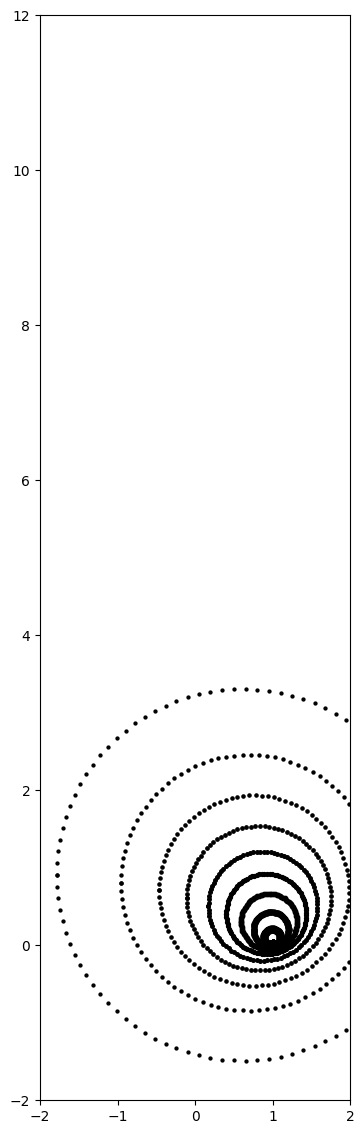

In [134]:
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.pyplot import subplots

fig, ax = subplots(figsize=(4,20))
p = ax.plot([0, np.cos(0)], [0, np.sin(0)], '-ok') #, fine
ax.set_aspect(1.0)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 12)

plotted = []
trail_plots = []

ts = np.linspace(0, 10, 100)

def update(i):
    frame_number = list(ts).index(i)

    # set the new data for the main curve
    data_point = np.cos(i), i
    p[0].set_data(*data_point)

    # for each trail plot
    for j, trail_plot in enumerate(trail_plots):
        
        trail_plot[0][0].set_data(*circle(plotted[j], np.log(i-trail_plot[1]+1)))

    trail_plots.append((ax.plot(*data_point, 'o', ms=5/np.log(1+len(plotted)), color='k'), i))
    plotted.append(data_point)

    # print(int(i), plotted[frame_number], trail_plots[0][0][0].get_data())
            
import IPython
IPython.display.HTML(FuncAnimation(fig, update, frames=ts, interval=100).to_html5_video())

/var/folders/b6/zjrzfvq14h12kvt3_h7c4fwr0000gn/T/ipykernel_1811/2408815535.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv')
MovieWriter imagemagick unavailable; using Pillow instead.
/var/folders/b6/zjrzfvq14h12kvt3_h7c4fwr0000gn/T/ipykernel_1811/2408815535.py:22: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  p[0].set_data(*data_point)


/var/folders/b6/zjrzfvq14h12kvt3_h7c4fwr0000gn/T/ipykernel_1811/2408815535.py:27: RuntimeWarning: invalid value encountered in log
  trail_plot[0][0].set_data(*circle(plotted[j], np.log(i-trail_plot[1]+1)))


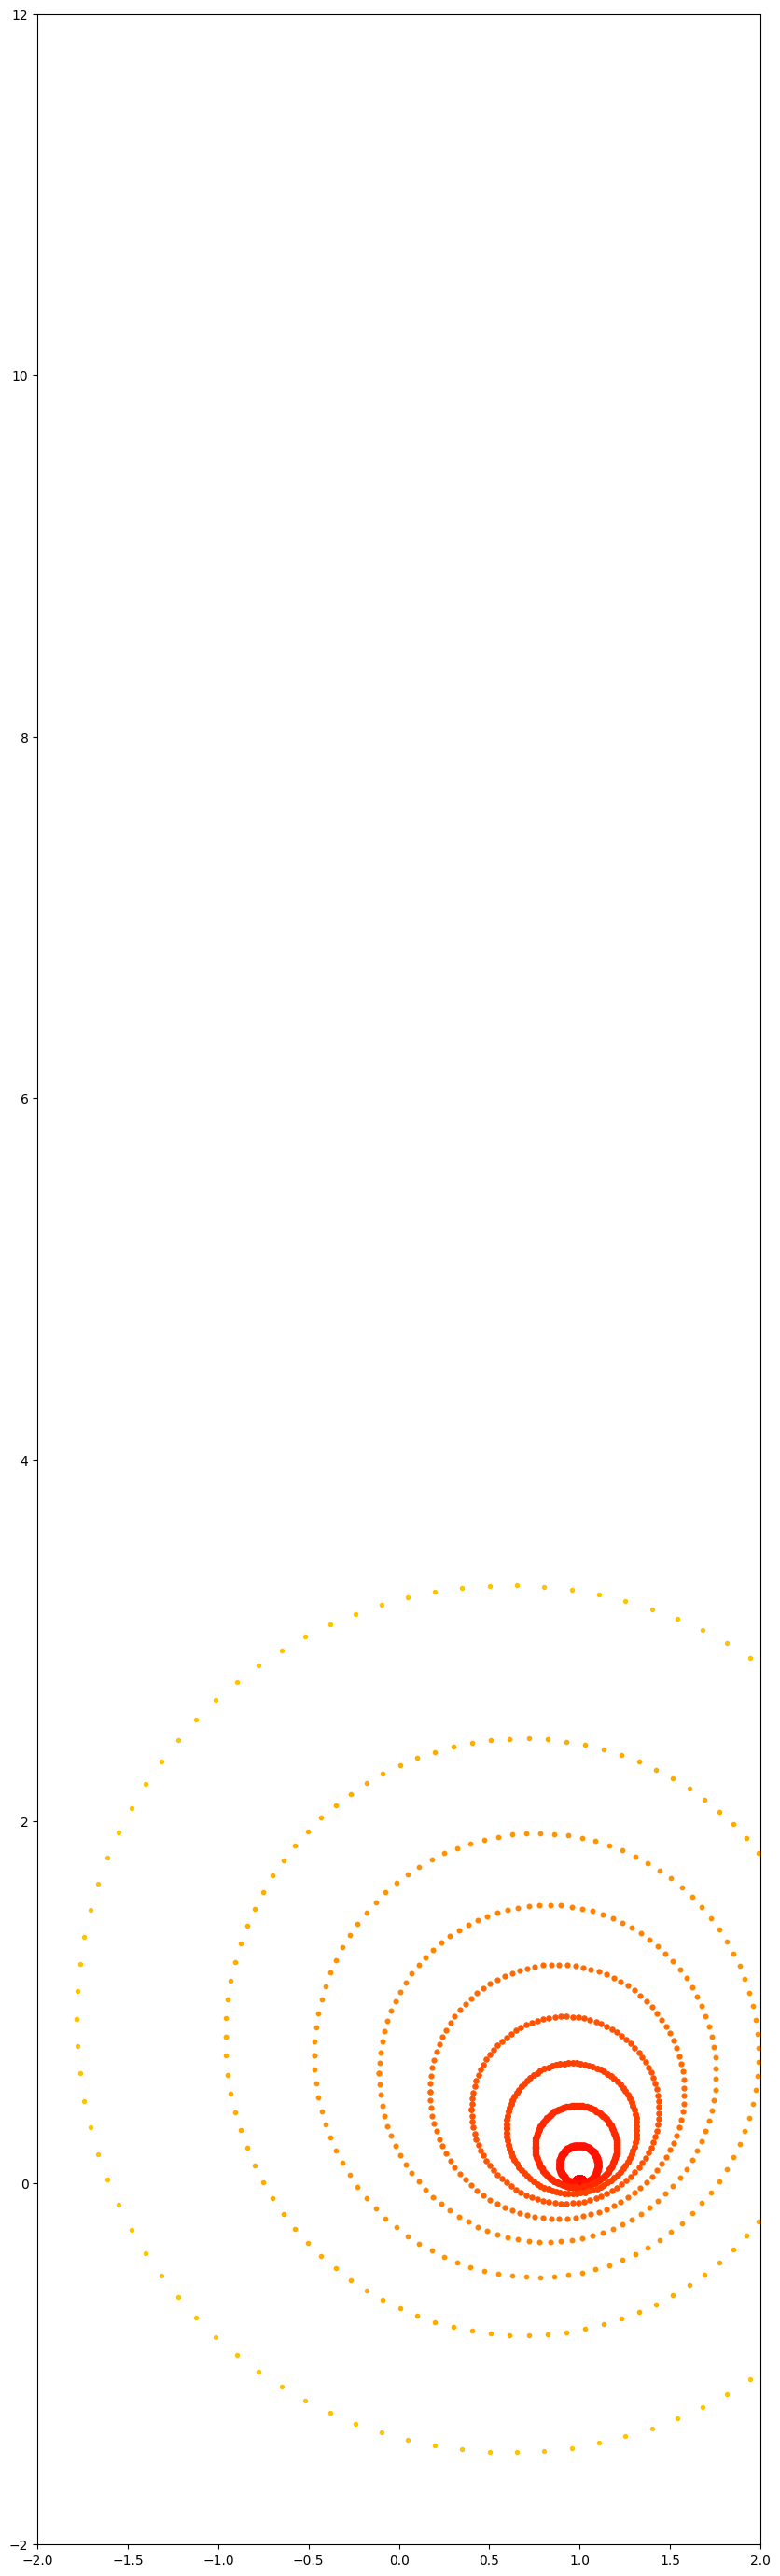

In [139]:
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.pyplot import subplots

cmap = plt.cm.get_cmap('hsv')

fig, ax = subplots(figsize=(10,40))
p = ax.plot([0, np.cos(0)], [0, np.sin(0)], '-ok') #, fine
ax.set_aspect(1.0)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 12)

plotted = []
trail_plots = []

ts = np.linspace(0, 10, 100)

def update(i):
    frame_number = list(ts).index(i)

    # set the new data for the main curve
    data_point = np.cos(i), i
    p[0].set_data(*data_point)

    # for each trail plot
    for j, trail_plot in enumerate(trail_plots):
        
        trail_plot[0][0].set_data(*circle(plotted[j], np.log(i-trail_plot[1]+1)))

    trail_plots.append((ax.plot(*data_point, 'o', ms=12/(1+np.sqrt(len(plotted))), color=cmap(i/7)), i))
    plotted.append(data_point)

    # print(int(i), plotted[frame_number], trail_plots[0][0][0].get_data())
            

FuncAnimation(fig, update, frames=ts, interval=100).save('test.gif', writer='imagemagick', fps=10)